**Estudiante:** César Emilio García Ávalos

**Actividad:** M7_AI1_Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randInt

import warnings
from time import time
import datetime
import random

%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None


# Función para medir los modelos en hh:mm:ss

def segundos_a_minutos(segundos):
    horas = int(segundos / 60 / 60)
    segundos -= horas*60*60
    minutos = int(segundos/60)
    segundos -= minutos*60
    return f"{horas:02d}:{minutos:02d}:{segundos:02d}"

In [2]:
mnist = keras.datasets.mnist
(train_digits, train_labeldigit), (test_digits, test_labeldigit) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
(train_digits.shape, train_labeldigit.shape), (test_digits.shape, test_labeldigit.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_fashion, train_labelfashion), (test_fashion, test_labelfashion) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
(train_fashion.shape, train_labelfashion.shape), (test_fashion.shape, test_labelfashion.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

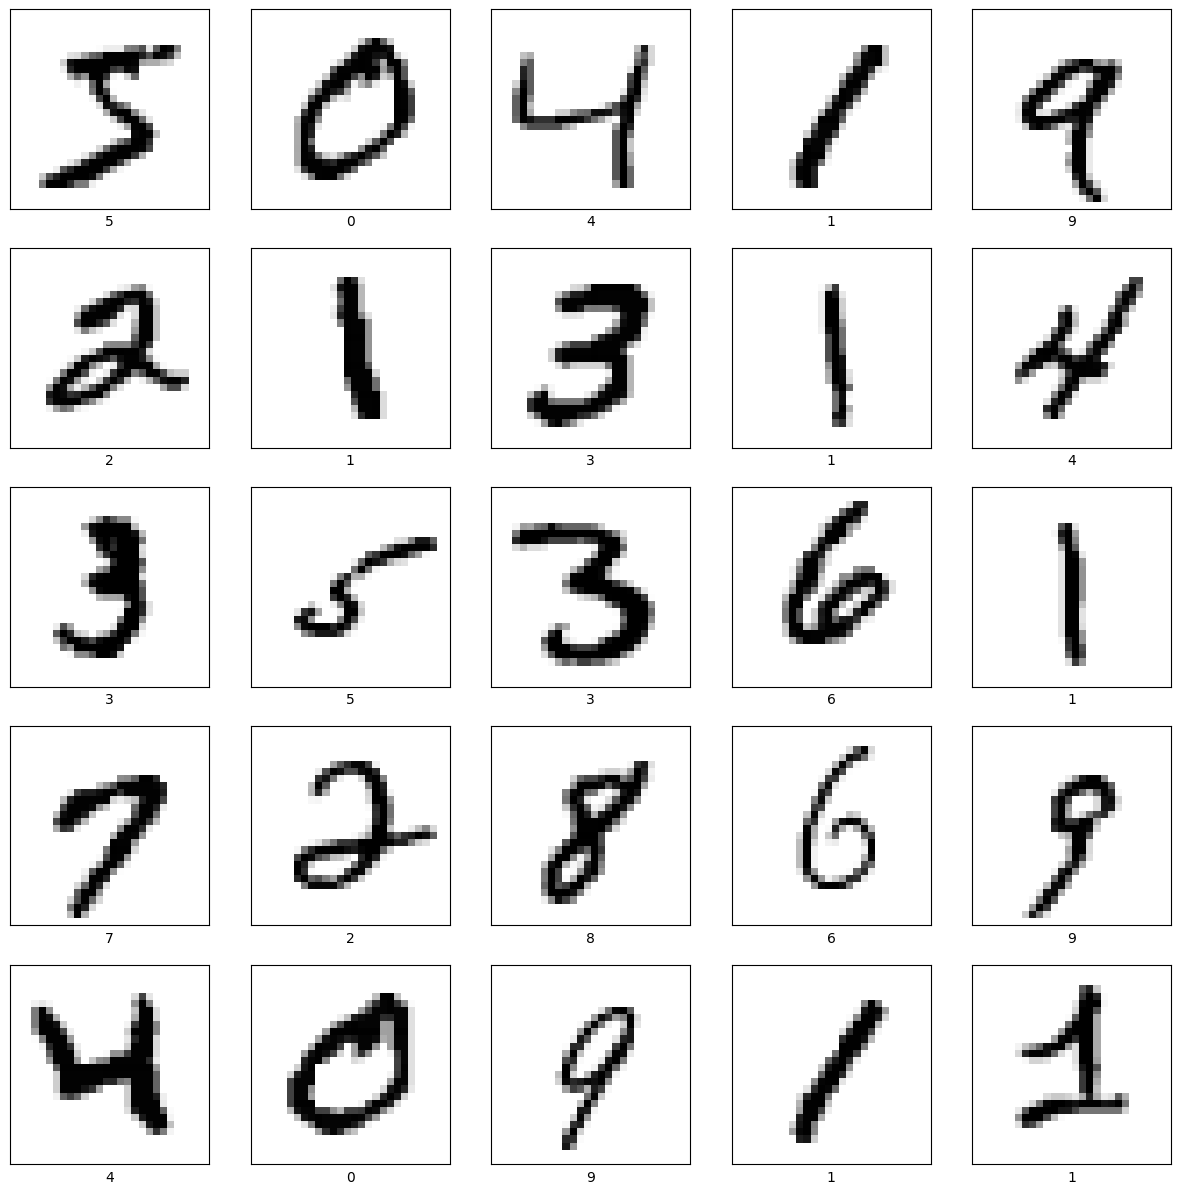

In [6]:
# Dataset MNIST
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_digits[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(train_labeldigit[i])
plt.show()

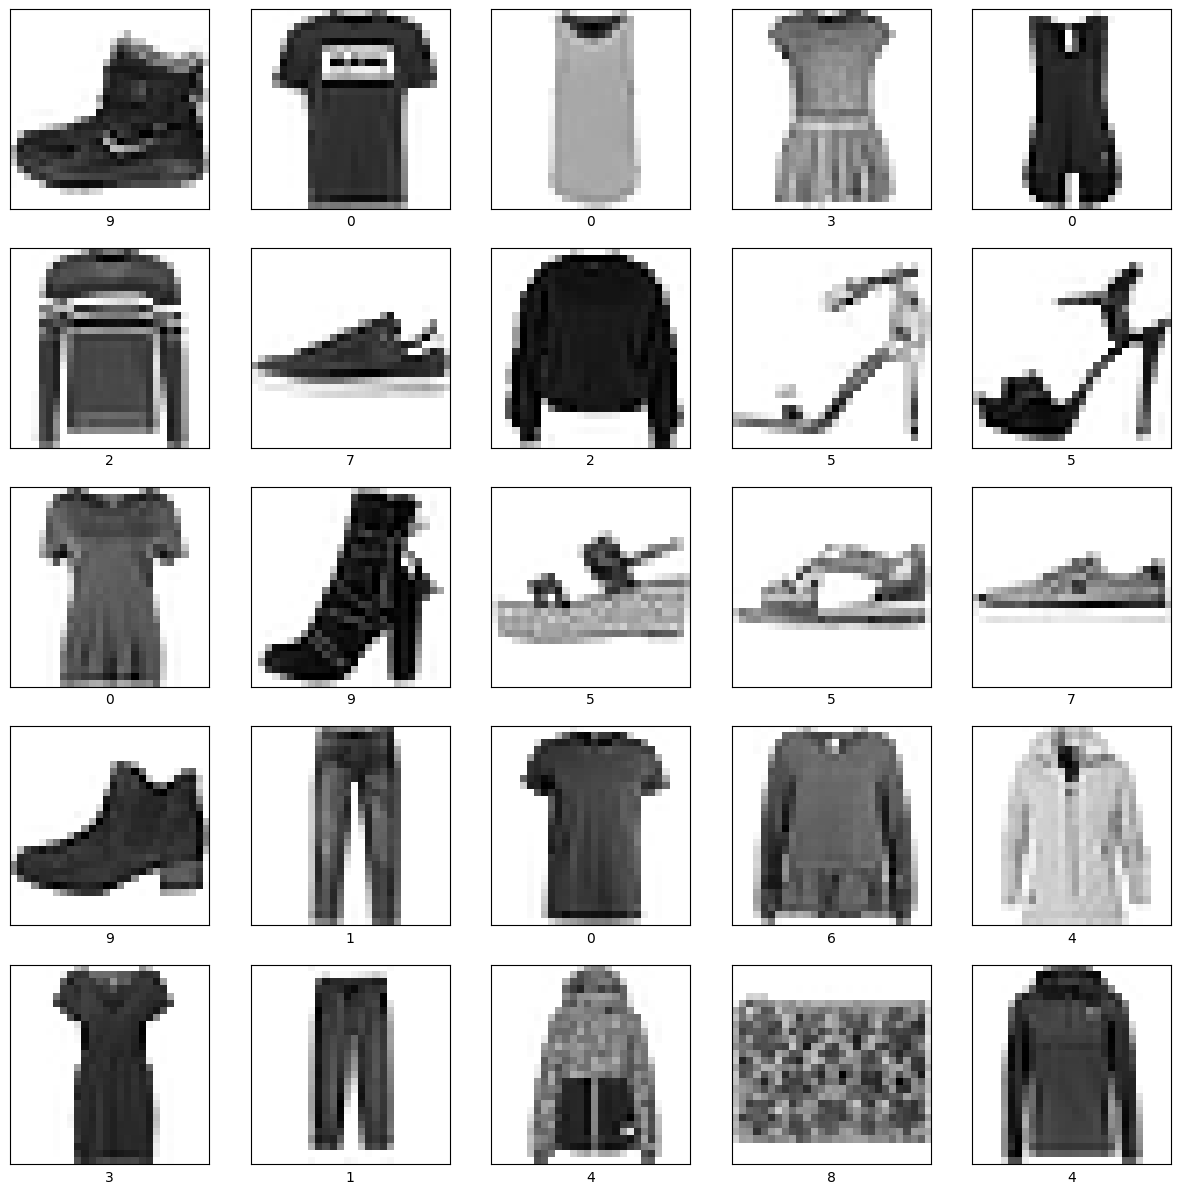

In [7]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_fashion[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xlabel(train_labelfashion[i])
plt.show()

In [8]:
# Para dataset MNIST
train_digits = train_digits.reshape(60000, -1)
test_digits = test_digits.reshape(10000, -1)

In [9]:
# Para dataset FASHION_MNIST
train_fashion = train_fashion.reshape(60000, -1)
test_fashion = test_fashion.reshape(10000, -1)

In [10]:
# Corroboramos la dimensiones de los dataset:

(train_digits.shape, test_digits.shape), (train_fashion.shape, test_fashion.shape)

(((60000, 784), (10000, 784)), ((60000, 784), (10000, 784)))

In [11]:
# Seleccionamos los 20000 primeros registros de cada array de train
train_digits = train_digits[:20000]
train_labeldigit = train_labeldigit[:20000]

train_fashion = train_fashion[:20000]
train_labelfashion = train_labelfashion[:20000]

In [12]:
# Normalizacion de 0-255 a 0-1

train_digits = train_digits.astype('float32')/255.0
test_digits = test_digits.astype('float32')/255.0

train_fashion = train_fashion.astype('float32')/255.0
test_fashion = test_fashion.astype('float32')/255.0

In [15]:
# Comprobamos tamaño de nuestros array de train
train_digits.shape, train_labeldigit.shape, train_fashion.shape, train_labelfashion.shape

((20000, 784), (20000,), (20000, 784), (20000,))

In [16]:
digit = np.unique(train_labeldigit)
digit

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [17]:
fashion = np.unique(train_labelfashion)
fashion

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# **MODELOS SVM**

**MNIST dataset**

**Algoritmo SVM con los parametros por defecto para ver su comportamiento**

In [18]:
timeIni = time()
modelo1_svc_default = SVC()
modelo1_svc_default.fit(train_digits, train_labeldigit)
timeEnd = time()

timeDiff_modelo1_default = segundos_a_minutos(int(timeEnd - timeIni))

In [19]:
y_pred_default1 = modelo1_svc_default.predict(test_digits)

In [20]:
print("Modelo SVC con parámetros por defecto en dataset MNIST:")
print("Tiempo necesario para su cómputo: ", timeDiff_modelo1_default)
print("ACCURACY: ", accuracy_score(test_labeldigit,y_pred_default1))


print("Reporte de Clasificación:\n\n", classification_report(test_labeldigit,y_pred_default1))

Modelo SVC con parámetros por defecto en dataset MNIST:
Tiempo necesario para su cómputo:  00:00:49
ACCURACY:  0.9695
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.95      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.97      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [21]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labeldigit,y_pred_default1))

Matriz de confusion:

 [[ 969    0    1    0    0    3    4    1    2    0]
 [   0 1124    3    2    0    2    1    1    2    0]
 [   5    0 1001    1    4    0    2   10    9    0]
 [   0    0    5  982    0    5    0    9    7    2]
 [   1    0    3    0  955    0    6    1    2   14]
 [   5    1    0   14    1  856    6    1    6    2]
 [   8    3    0    1    2    5  937    0    2    0]
 [   0   11   16    7    2    0    0  980    0   12]
 [   4    0    3   12    4    8    2    4  935    2]
 [   5    6    2    8   17    1    0    8    6  956]]


**SVC con diferentes Kernel y utilizando GridSearchCV**

Ahora vamos a utilizar GridSearchCV para buscar una mejor aproximación utilizando Cross Validation de 10 veces y dos kernel diferentes Linear (Lineal) y Rbf (Gausiano). Además para hacer más rapido el procesado se utilizará gamma y probability por defecto (scale y false)

In [22]:
# Definimos los parametros asociados a nuestro algoritmo SVC (KERNEL = LINEAR) :
param_grid_linear = { 'kernel': ['linear'],
                      'C': [1, 10, 100, 1000],
                      'gamma': ['scale'],
                      'probability': [False]
                    }

In [23]:
# Kernel : Linear
timeIni = time()
model_digit_lineal = GridSearchCV(SVC(),
                                  param_grid = param_grid_linear,
                                  cv=5,
                                  verbose=1,
                                  scoring="accuracy")

model_digit_lineal.fit(train_digits, train_labeldigit)
timeEnd = time()
timeDiff_model1 = segundos_a_minutos(int(timeEnd - timeIni))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [24]:
y_pred_lineal_digits = model_digit_lineal.predict(test_digits)

In [25]:
print("Modelo SVC con parámetros Kernel = LINEAR (Lineal):")
print("La mejor parametrización para la SVM (en el conjunto de training) es: ", model_digit_lineal.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model1)
print("ACCURACY: ", model_digit_lineal.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labeldigit,y_pred_lineal_digits))

Modelo SVC con parámetros Kernel = LINEAR (Lineal):
La mejor parametrización para la SVM (en el conjunto de training) es:  {'C': 1, 'gamma': 'scale', 'kernel': 'linear', 'probability': False}
Tiempo necesario para su cómputo:  00:10:14
ACCURACY:  0.9207000000000001
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.96      0.99      0.97      1135
           2       0.91      0.92      0.92      1032
           3       0.88      0.91      0.90      1010
           4       0.92      0.95      0.93       982
           5       0.90      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.92      0.87      0.89       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.92      0.92     10000
we

In [26]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labeldigit,y_pred_lineal_digits))

Matriz de confusion:

 [[ 951    0    4    3    0   11    8    1    1    1]
 [   0 1118    3    3    1    2    1    1    6    0]
 [   8    7  952   16    4    3    9   12   17    4]
 [   4    4   21  924    1   20    0   11   20    5]
 [   0    0    8    2  931    1    9    6    2   23]
 [  14    5    6   41    7  780   10    2   24    3]
 [   9    3   14    0    7   13  911    1    0    0]
 [   2    9   22   13   17    0    0  943    0   22]
 [   9    7   16   31   10   33    8    6  846    8]
 [  11    8    2   14   35    4    1   26    7  901]]


In [27]:
# Analisis de Cross-Validation del modelo con Kernel = Linear

cv_results_digit_lineal = pd.DataFrame(model_digit_lineal.cv_results_)
cv_results_digit_lineal

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,20.064511,0.759472,7.822262,0.199408,1,scale,linear,False,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear',...",0.92875,0.92575,0.92050,0.90825,0.92025,0.9207,0.007008,1
1,21.281181,0.779673,7.327256,0.474232,10,scale,linear,False,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'...",0.91825,0.91500,0.90900,0.89875,0.90900,0.9100,0.006658,2
2,23.142534,1.414072,7.543561,1.053992,100,scale,linear,False,"{'C': 100, 'gamma': 'scale', 'kernel': 'linear...",0.91800,0.91475,0.90925,0.89925,0.90675,0.9096,0.006518,3
3,21.540148,0.664765,7.477344,0.281928,1000,scale,linear,False,"{'C': 1000, 'gamma': 'scale', 'kernel': 'linea...",0.91800,0.91475,0.90925,0.89925,0.90675,0.9096,0.006518,3


In [28]:
# Definimos los parametros asociados a nuestro algoritmo SVC (KERNEL = RBF) :
param_grid_rbf = {'kernel': ['rbf'],
                  'C': [1, 10, 100, 1000],
                  'gamma': ['scale'],
                  'probability': [False]
                  }

In [29]:
# Kernel : Gausiano

timeIni = time()
model_digit_rbf = GridSearchCV(SVC(),
                               param_grid = param_grid_rbf,
                               cv=5,
                               verbose=1,
                               scoring="accuracy")

model_digit_rbf.fit(train_digits, train_labeldigit)
timeEnd = time()
timeDiff_model2 = segundos_a_minutos(int(timeEnd - timeIni))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [30]:
y_pred_rbf_digits = model_digit_rbf.predict(test_digits)

In [31]:
print("Modelo SVC con parámetros Kernel = RBF (Gausiano):")
print("Mejores Parametros SVM (en el conjunto de training) es: ", model_digit_rbf.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model2)
print("ACCURACY: ", model_digit_rbf.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labeldigit,y_pred_rbf_digits))

Modelo SVC con parámetros Kernel = RBF (Gausiano):
Mejores Parametros SVM (en el conjunto de training) es:  {'C': 10, 'gamma': 'scale', 'kernel': 'rbf', 'probability': False}
Tiempo necesario para su cómputo:  00:17:26
ACCURACY:  0.9737
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.

In [32]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labeldigit,y_pred_rbf_digits))

Matriz de confusion:

 [[ 970    0    2    1    0    2    2    1    2    0]
 [   0 1128    4    0    0    1    2    0    0    0]
 [   4    1 1009    0    2    0    2    9    5    0]
 [   0    0    2  990    0    5    0    6    5    2]
 [   1    0    2    0  960    0    4    1    2   12]
 [   3    1    0   12    2  861    7    1    3    2]
 [   6    3    1    0    2    5  939    0    2    0]
 [   0   12   10    3    3    0    0  990    1    9]
 [   3    1    2    5    3    5    1    3  949    2]
 [   3    2    1    7   12    2    0   10    1  971]]


In [33]:
# Analisis de Cross-Validation del modelo con Kernel = RBF

cv_results_digit_rbf = pd.DataFrame(model_digit_rbf.cv_results_)
cv_results_digit_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,param_probability,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,32.008259,0.456270,19.643735,0.240517,1,scale,rbf,False,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf', 'p...",0.9715,0.96800,0.9660,0.96425,0.97200,0.96835,0.003023,4
1,29.993872,1.074964,19.374021,0.448564,10,scale,rbf,False,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf', '...",0.9755,0.97550,0.9730,0.97125,0.97325,0.97370,0.001623,1
2,30.511235,0.755061,19.287121,0.437520,100,scale,rbf,False,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf', ...",0.9750,0.97525,0.9725,0.97150,0.97350,0.97355,0.001435,2
3,29.983967,0.441397,19.513302,0.481280,1000,scale,rbf,False,"{'C': 1000, 'gamma': 'scale', 'kernel': 'rbf',...",0.9750,0.97525,0.9725,0.97150,0.97350,0.97355,0.001435,2


Se han realizado tres modelos para este dataset, el primero utilizando los valores por defecto del modelo SVC, donde utiliza el kernel Gausiano (RBF), un C=1, gamma = Scale y donde el modelo tuvo un Accuracy de 96.95%, bastante bueno y bastante rápido en su ejecución.

Luego se ha utilizado GridSearchCV para validar el modelo con Cross Validation (por tema de ejecución se utilizó solo CV = 5). Acá se utilizó dos Kernel tanto el Linear (Lineal) como el RBF (Gausiano) y con 4 posibles valores de C = [1,10,100,1000]. Así el mejor modelo fue utilizando el Kernel Gausiano con un C=10, mejorando en más de 1% el accuracy del modelo por defecto llegando a 97,37%, que consideró igual el mismo kernel (RBF) pero con un C=1. Cabe destacar que la implementación en Scikit-learn del parametro C es inversamente al valor teorico de C. O sea esto significa que un valor de C=1 o C=10 no nos quiere indicar que menos se penalizan los errores, sino que es un valor que penaliza bastante los errores.

# **Fashion_MNIST dataset**

**SVC con parámetros por defecto**

In [34]:
timeIni = time()
modelo2_svc_default = SVC()
modelo2_svc_default.fit(train_fashion, train_labelfashion)
timeEnd = time()

timeDiff_modelo2_default = segundos_a_minutos(int(timeEnd - timeIni))

In [35]:
y_pred_default2 = modelo2_svc_default.predict(test_fashion)

In [36]:
print("Modelo SVC con parámetros por defecto en dataset FASHION_MNIST:")
print("Tiempo necesario para su cómputo: ", timeDiff_modelo2_default)
print("ACCURACY: ", accuracy_score(test_labelfashion,y_pred_default2))

print("Reporte de Clasificación:\n\n", classification_report(test_labelfashion,y_pred_default2))

Modelo SVC con parámetros por defecto en dataset FASHION_MNIST:
Tiempo necesario para su cómputo:  00:00:55
ACCURACY:  0.8639
Reporte de Clasificación:

               precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.77      0.79      0.78      1000
           3       0.84      0.89      0.86      1000
           4       0.78      0.79      0.79      1000
           5       0.95      0.94      0.94      1000
           6       0.67      0.62      0.65      1000
           7       0.92      0.93      0.92      1000
           8       0.96      0.97      0.96      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [37]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labelfashion,y_pred_default2))

Matriz de confusion:

 [[810   0  14  53   3   2 107   0  11   0]
 [  3 955   5  30   3   0   3   0   1   0]
 [ 14   1 790  11 113   0  67   0   4   0]
 [ 23   5  12 887  29   0  41   0   3   0]
 [  0   0  93  33 793   0  77   0   4   0]
 [  0   0   0   1   0 942   0  40   1  16]
 [134   1 112  36  77   0 624   0  16   0]
 [  0   0   0   0   0  31   0 927   0  42]
 [  2   1   1   6   2   4  12   5 967   0]
 [  0   0   0   0   0  15   0  40   1 944]]


**SVC con diferentes Kernel y utilizando GridSearchCV**

In [ ]:
# Kernel : Linear

timeIni = time()
model_fashion_lineal = GridSearchCV(SVC(),
                                    param_grid = param_grid_linear,
                                    cv=5,
                                    verbose=1,
                                    scoring="accuracy")

model_fashion_lineal.fit(train_fashion, train_labelfashion)
timeEnd = time()
timeDiff_model3 = segundos_a_minutos(int(timeEnd - timeIni))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [ ]:
y_pred_lineal_fashion = model_fashion_lineal.predict(test_fashion)

In [ ]:
print("Modelo SVC con parámetros Kernel = LINEAR (Lineal):")
print("La mejor parametrización para la SVM (en el conjunto de training) es: ", model_fashion_lineal.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model3)
print("ACCURACY: ", model_fashion_lineal.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labelfashion,y_pred_lineal_fashion))

In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labelfashion,y_pred_lineal_fashion))

In [ ]:
# Analisis de Cross-Validation del modelo con Kernel = Linear

cv_results_fashion_lineal = pd.DataFrame(model_fashion_lineal.cv_results_)
cv_results_fashion_lineal

In [ ]:
# Kernel : Gausiano

timeIni = time()
model_fashion_rbf = GridSearchCV(SVC(),
                                 param_grid = param_grid_rbf,
                                 cv=5,
                                 verbose=1,
                                 scoring="accuracy")

model_fashion_rbf.fit(train_fashion, train_labelfashion)
timeEnd = time()
timeDiff_model4 = segundos_a_minutos(int(timeEnd - timeIni))

In [ ]:
y_pred_rbf_fashion = model_fashion_rbf.predict(test_fashion)

In [ ]:
print("Modelo SVC con parámetros Kernel = RBF (Gausiano):")
print("La mejor parametrización para la SVM (en el conjunto de training) es: ", model_fashion_rbf.best_params_)
print("Tiempo necesario para su cómputo: ", timeDiff_model4)
print("ACCURACY: ", model_fashion_rbf.best_score_)

print("Reporte de Clasificación:\n\n", classification_report(test_labelfashion,y_pred_rbf_fashion))

In [ ]:
print("Matriz de confusion:\n\n", confusion_matrix(test_labelfashion,y_pred_rbf_fashion))

In [ ]:
# Analisis de Cross-Validation del modelo con Kernel = RBF

cv_results_fashion_rbf = pd.DataFrame(model_fashion_rbf.cv_results_)
cv_results_fashion_rbf

Al igual que en el conjunto de datos MNIST, se han desarrollado tres modelos para este dataset. En el primero, se utilizan los valores por defecto del modelo SVC con kernel Gaussiano (RBF), C=1, y gamma=Scale. Este modelo alcanzó un Accuracy del 86.39%. Aunque este resultado es considerablemente menor que el modelo anterior, es evidente que los datos son considerablemente más complejos que los del dataset de dígitos.

Posteriormente, se aplicó GridSearchCV para validar el modelo mediante Cross Validation (CV=5 debido a restricciones de tiempo de ejecución). Se evaluaron dos kernels: Lineal y Gaussiano (RBF), utilizando cuatro posibles valores para el parámetro C [1, 10, 100, 1000]. El modelo más efectivo resultó ser el que empleó el kernel Gaussiano con C=10, logrando un Accuracy del 88%.

En ambos datasets, se observó que el kernel Gaussiano es significativamente más efectivo que el kernel Lineal.